In [44]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
#import yfinance as yf
import pandas_datareader.data as web
#yf.pdr_override
import warnings

def analyse(X, cutoff = 0.05):
    # Ho root unitary test (non stationary)
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print(f'p-value = {pvalue} Serie = {X.name} is stationary')
        return True
    else:
        print(f'p-value = {pvalue} Serie = {X.name} isnt stationary')
        return False

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [45]:
plt.rcParams['figure.figsize'] = (50,15)
plt.style.use('dark_background')

In [46]:
df = pd.read_csv('/content/drive/MyDrive/Python/Programs/Data/2010-01-01-00:00:00 to 2020-12-18-21:00:00 H1/EURUSD_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'Close','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low',
                                                                                                                                                                               '<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>','Date'])

In [47]:
type(df)

pandas.core.frame.DataFrame

In [48]:
df.head()

,Time,Open,High,Low,Close,TickVol
0,00:00:00,1.43259,1.43336,1.43151,1.43153,969
1,01:00:00,1.43151,1.43153,1.42879,1.42886,2098
2,02:00:00,1.42885,1.42885,1.42569,1.42705,2082
3,03:00:00,1.42702,1.42989,1.42700,1.42939,1544
4,04:00:00,1.42938,1.42968,1.42718,1.42848,1131


In [49]:
df.shape

(67999, 6)

In [50]:
df.count()

Time       67999
Open       67999
High       67999
Low        67999
Close      67999
TickVol    67999
dtype: int64

In [51]:
df['ClosePCTChange'] = df['Close'].pct_change()
df['CloseDiff'] = df['Close'].diff()
df['CloseLogEPCT'] = np.log(df['Close']).pct_change()
df['CloseLogEDiff'] = np.log(df['Close']).diff()
df['CloseLog10PCT'] = np.log10(df['Close']).pct_change()
df['CloseLog10Diff'] = np.log10(df['Close']).diff()
df

,Time,Open,High,Low,Close,TickVol,ClosePCTChange,CloseDiff,CloseLogEPCT,CloseLogEDiff,CloseLog10PCT,CloseLog10Diff
0,00:00:00,1.43259,1.43336,1.43151,1.43153,969,NaN,NaN,NaN,NaN,NaN,NaN
1,01:00:00,1.43151,1.43153,1.42879,1.42886,2098,-0.001865,-0.00267,-0.005204,-0.001867,-0.005204,-0.000811
2,02:00:00,1.42885,1.42885,1.42569,1.42705,2082,-0.001267,-0.00181,-0.003552,-0.001268,-0.003552,-0.000550
3,03:00:00,1.42702,1.42989,1.42700,1.42939,1544,0.001640,0.00234,0.004607,0.001638,0.004607,0.000712
4,04:00:00,1.42938,1.42968,1.42718,1.42848,1131,-0.000637,-0.00091,-0.001783,-0.000637,-0.001783,-0.000277
...,...,...,...,...,...,...,...,...,...,...,...,...
67994,17:00:00,1.22376,1.22473,1.22267,1.22350,4754,-0.000212,-0.00026,-0.001052,-0.000212,-0.001052,-0.000092
67995,18:00:00,1.22350,1.22362,1.22256,1.22353,3614,0.000025,0.00003,0.000122,0.000025,0.000122,0.000011
67996,19:00:00,1.22354,1.22459,1.22328,1.22368,1920,0.000123,0.00015,0.000608,0.000123,0.000608,0.000053
67997,20:00:00,1.22367,1.22434,1.22363,1.22421,1203,0.000433,0.00053,0.002145,0.000433,0.002145,0.000188


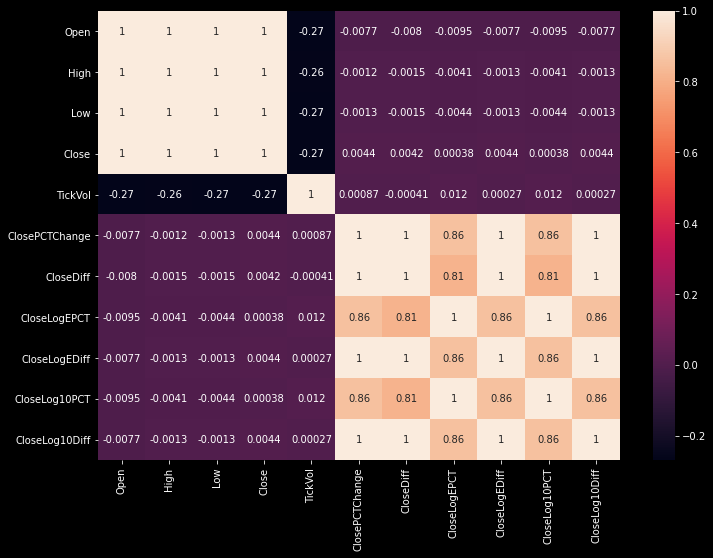

In [52]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data=df.corr(),annot=True,ax=ax)

In [53]:
df.describe()

,Open,High,Low,Close,TickVol,ClosePCTChange,CloseDiff,CloseLogEPCT,CloseLogEDiff,CloseLog10PCT,CloseLog10Diff
count,67999.000000,67999.000000,67999.000000,67999.000000,67999.000000,67998.000000,67998.000000,67998.000000,67998.000000,67998.000000,6.799800e+04
mean,1.222518,1.223435,1.221621,1.222517,3321.911175,-0.000002,-0.000003,0.000029,-0.000002,0.000029,-9.991615e-07
std,0.111974,0.112099,0.111839,0.111971,2601.911103,0.001135,0.001402,0.008688,0.001135,0.008688,4.928130e-04
min,1.035550,1.037000,1.032490,1.035560,1.000000,-0.020176,-0.022720,-0.181709,-0.020382,-0.181709,-8.851851e-03
25%,1.121255,1.121895,1.120545,1.121250,1483.000000,-0.000453,-0.000550,-0.002554,-0.000453,-0.002554,-1.967207e-04
50%,1.192130,1.192860,1.191350,1.192120,2601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,1.323860,1.324850,1.322845,1.323870,4387.000000,0.000455,0.000550,0.002561,0.000455,0.002561,1.974316e-04
max,1.493150,1.493850,1.490500,1.493190,37898.000000,0.015895,0.021060,0.229461,0.015770,0.229461,6.848850e-03


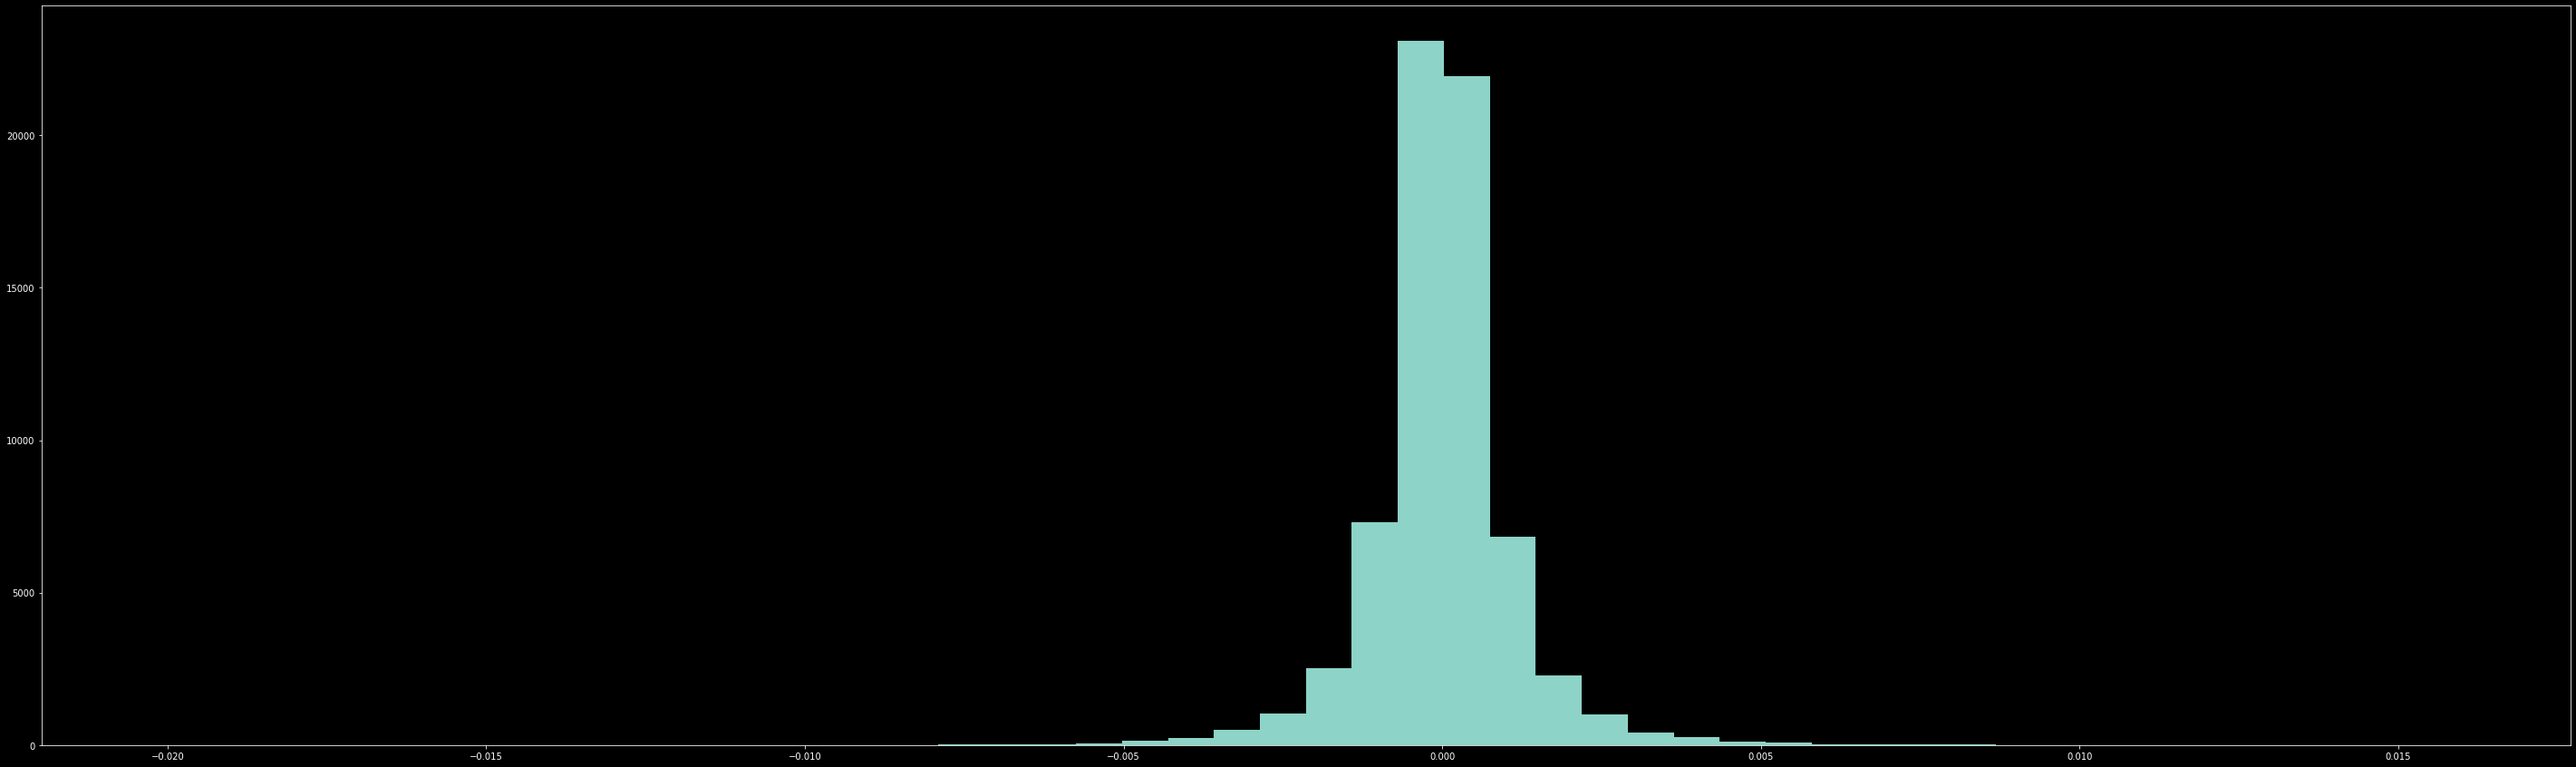

In [105]:
plt.hist(x=df['ClosePCTChange'],bins=50)
plt.show()

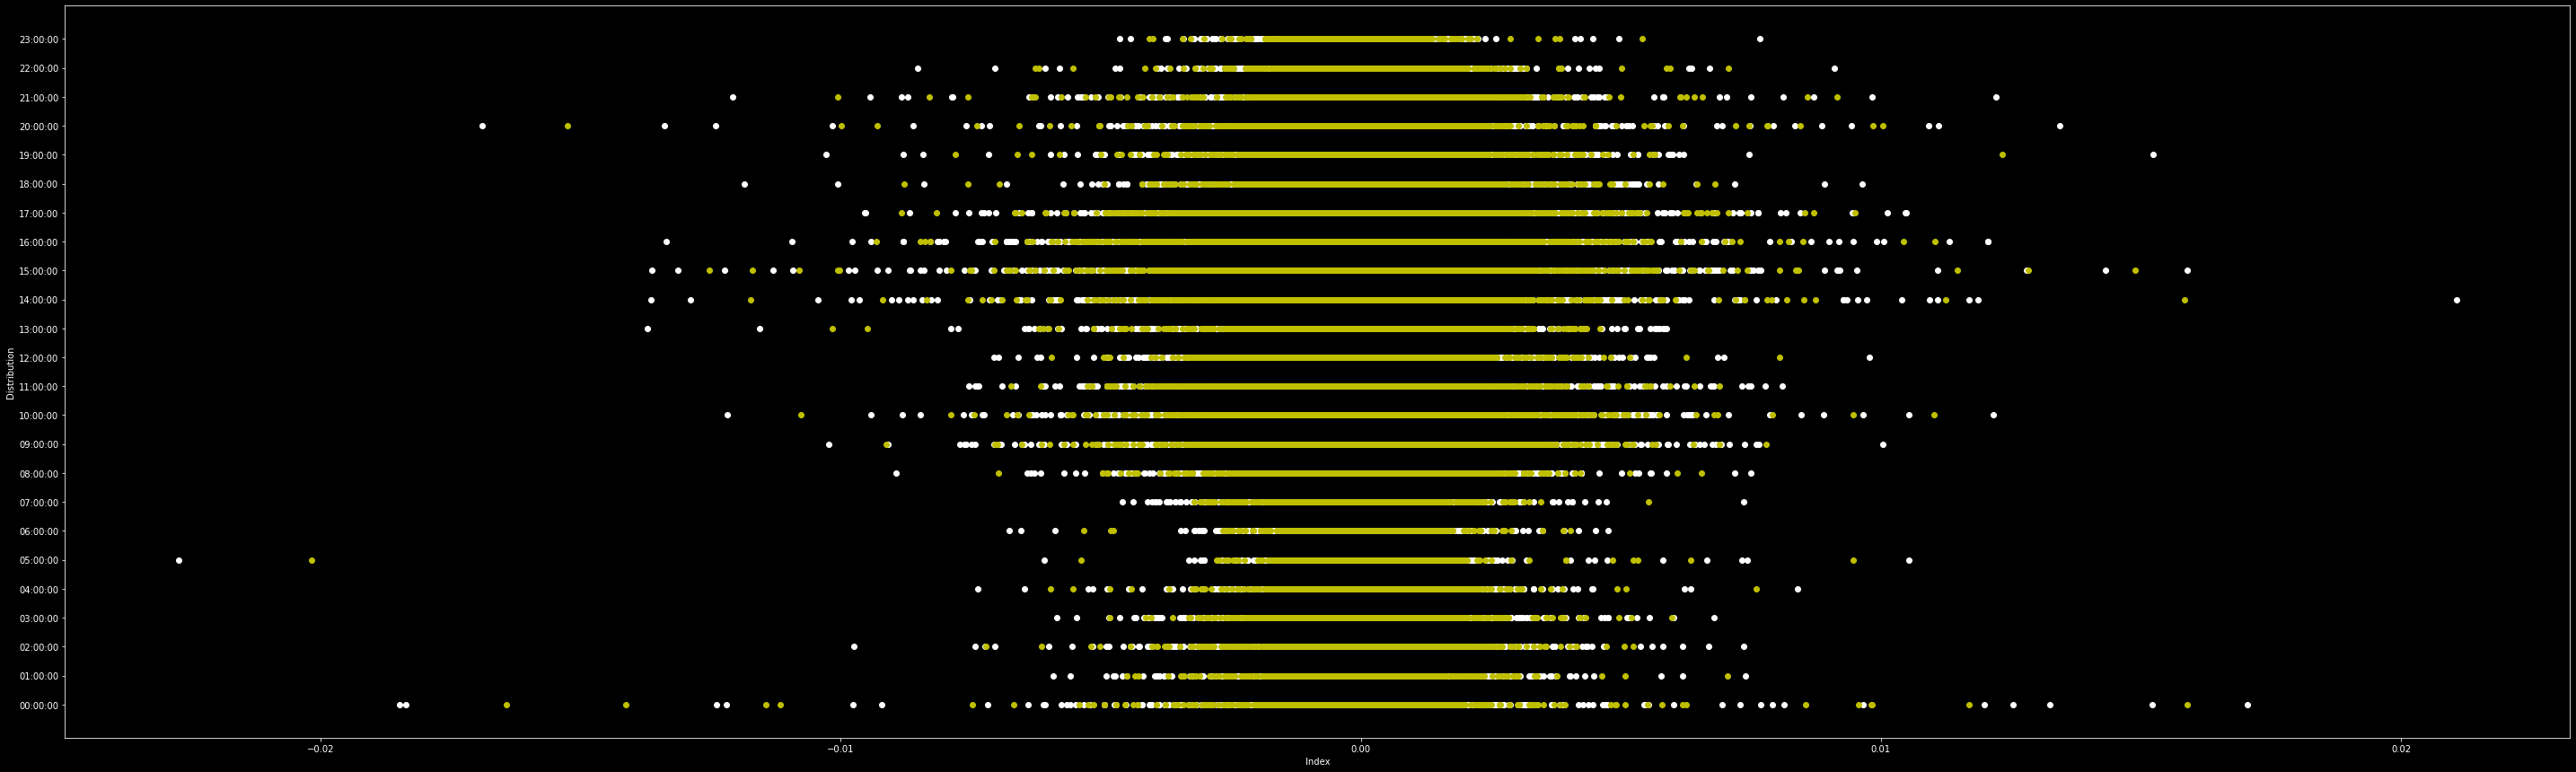

In [55]:
plt.scatter(x=df['CloseDiff'],y=df['Time'],color='w',label='CloseLog10PCT')
plt.scatter(x=df['ClosePCTChange'],y=df['Time'],color='y',label='CloseLog10Diff')
plt.xlabel('Index')
plt.ylabel('Distribution')
plt.show()

In [96]:
df['CloseLogEPCT'].corr(df['CloseLog10PCT'])

0.9999999999999998

In [57]:
df.head(20)

,Time,Open,High,Low,Close,TickVol,ClosePCTChange,CloseDiff,CloseLogEPCT,CloseLogEDiff,CloseLog10PCT,CloseLog10Diff
0,00:00:00,1.43259,1.43336,1.43151,1.43153,969,NaN,NaN,NaN,NaN,NaN,NaN
1,01:00:00,1.43151,1.43153,1.42879,1.42886,2098,-0.001865,-0.00267,-0.005204,-0.001867,-0.005204,-0.000811
2,02:00:00,1.42885,1.42885,1.42569,1.42705,2082,-0.001267,-0.00181,-0.003552,-0.001268,-0.003552,-0.000550
3,03:00:00,1.42702,1.42989,1.42700,1.42939,1544,0.001640,0.00234,0.004607,0.001638,0.004607,0.000712
4,04:00:00,1.42938,1.42968,1.42718,1.42848,1131,-0.000637,-0.00091,-0.001783,-0.000637,-0.001783,-0.000277
5,05:00:00,1.42847,1.42985,1.42822,1.42897,1040,0.000343,0.00049,0.000962,0.000343,0.000962,0.000149
6,06:00:00,1.42894,1.43082,1.42874,1.43004,1105,0.000749,0.00107,0.002097,0.000749,0.002097,0.000325
7,07:00:00,1.43003,1.43090,1.42800,1.42949,1723,-0.000385,-0.00055,-0.001075,-0.000385,-0.001075,-0.000167
8,08:00:00,1.42946,1.43068,1.42688,1.43034,2571,0.000595,0.00085,0.001664,0.000594,0.001664,0.000258
9,09:00:00,1.43032,1.43384,1.42999,1.43373,2733,0.002370,0.00339,0.006614,0.002367,0.006614,0.001028


In [102]:
df.describe().round(7)

,Open,High,Low,Close,TickVol,ClosePCTChange,CloseDiff,CloseLogEPCT,CloseLogEDiff,CloseLog10PCT,CloseLog10Diff
count,67999.000000,67999.000000,67999.000000,67999.000000,67999.000000,67998.000000,67998.000000,67998.000000,67998.000000,67998.000000,67998.000000
mean,1.222518,1.223435,1.221621,1.222517,3321.911175,-0.000002,-0.000003,0.000029,-0.000002,0.000029,-0.000001
std,0.111974,0.112099,0.111838,0.111971,2601.911103,0.001135,0.001402,0.008688,0.001135,0.008688,0.000493
min,1.035550,1.037000,1.032490,1.035560,1.000000,-0.020176,-0.022720,-0.181709,-0.020382,-0.181709,-0.008852
25%,1.121255,1.121895,1.120545,1.121250,1483.000000,-0.000453,-0.000550,-0.002554,-0.000453,-0.002554,-0.000197
50%,1.192130,1.192860,1.191350,1.192120,2601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.323860,1.324850,1.322845,1.323870,4387.000000,0.000455,0.000550,0.002561,0.000455,0.002561,0.000197
max,1.493150,1.493850,1.490500,1.493190,37898.000000,0.015895,0.021060,0.229461,0.015770,0.229461,0.006849


In [95]:
test=pd.DataFrame([df['ClosePCTChange'],df['CloseLogEPCT'],df['CloseLog10PCT']]).T
test

,ClosePCTChange,CloseLogEPCT,CloseLog10PCT
0,NaN,NaN,NaN
1,-0.001865,-0.005204,-0.005204
2,-0.001267,-0.003552,-0.003552
3,0.001640,0.004607,0.004607
4,-0.000637,-0.001783,-0.001783
...,...,...,...
67994,-0.000212,-0.001052,-0.001052
67995,0.000025,0.000122,0.000122
67996,0.000123,0.000608,0.000608
67997,0.000433,0.002145,0.002145


In [58]:
df.tail(10)

,Time,Open,High,Low,Close,TickVol,ClosePCTChange,CloseDiff,CloseLogEPCT,CloseLogEDiff,CloseLog10PCT,CloseLog10Diff
67989,12:00:00,1.22493,1.22578,1.22430,1.22543,2860,0.000416,0.00051,0.002052,0.000416,0.002052,0.000181
67990,13:00:00,1.22543,1.22601,1.22483,1.22558,2847,0.000122,0.00015,0.000602,0.000122,0.000602,0.000053
67991,14:00:00,1.22557,1.22687,1.22529,1.22546,3873,-0.000098,-0.00012,-0.000481,-0.000098,-0.000481,-0.000043
67992,15:00:00,1.22546,1.22604,1.22457,1.22488,4218,-0.000473,-0.00058,-0.002328,-0.000473,-0.002328,-0.000206
67993,16:00:00,1.22488,1.22536,1.22282,1.22376,5104,-0.000914,-0.00112,-0.004510,-0.000915,-0.004510,-0.000397
67994,17:00:00,1.22376,1.22473,1.22267,1.22350,4754,-0.000212,-0.00026,-0.001052,-0.000212,-0.001052,-0.000092
67995,18:00:00,1.22350,1.22362,1.22256,1.22353,3614,0.000025,0.00003,0.000122,0.000025,0.000122,0.000011
67996,19:00:00,1.22354,1.22459,1.22328,1.22368,1920,0.000123,0.00015,0.000608,0.000123,0.000608,0.000053
67997,20:00:00,1.22367,1.22434,1.22363,1.22421,1203,0.000433,0.00053,0.002145,0.000433,0.002145,0.000188
67998,21:00:00,1.22423,1.22433,1.22349,1.22422,1162,0.000008,0.00001,0.000040,0.000008,0.000040,0.000004


In [76]:
a=df.groupby('Time').sum()
a.describe

<bound method NDFrame.describe of                 Open        High  ...  CloseLog10PCT  CloseLog10Diff
Time                              ...                               
00:00:00  3465.27937  3466.91631  ...       0.289942       -0.003961
01:00:00  3466.70642  3468.48178  ...       1.282543        0.044736
02:00:00  3466.80389  3468.72815  ...      -0.487263       -0.029172
03:00:00  3466.73097  3468.83266  ...       0.809828        0.048194
04:00:00  3464.09917  3465.99075  ...       1.026530        0.062072
05:00:00  3465.64765  3467.24460  ...       0.442496        0.026935
06:00:00  3473.85844  3475.33805  ...       0.066737        0.001664
07:00:00  3473.86432  3475.65377  ...       0.649770        0.042035
08:00:00  3477.97455  3480.46039  ...      -0.117971       -0.019970
09:00:00  3480.34204  3483.72373  ...      -0.655656       -0.029728
10:00:00  3480.27807  3484.00705  ...       0.244930        0.034282
11:00:00  3480.38614  3483.61908  ...      -1.284818       -0.083258


In [78]:
a

,Open,High,Low,Close,TickVol,ClosePCTChange,CloseDiff,CloseLogEPCT,CloseLogEDiff,CloseLog10PCT,CloseLog10Diff
Time,,,,,,,,,,,
00:00:00,3465.27937,3466.91631,3463.81459,3465.39277,4034625,-0.007400,-0.01748,0.289942,-0.009121,0.289942,-0.003961
01:00:00,3466.70642,3468.48178,3465.11021,3466.80534,4981699,0.103762,0.10753,1.282543,0.103008,1.282543,0.044736
02:00:00,3466.80389,3468.72815,3464.82411,3466.72717,5748313,-0.066160,-0.07817,-0.487263,-0.067172,-0.487263,-0.029172
03:00:00,3466.73097,3468.83266,3464.80969,3466.86230,6755268,0.111935,0.13513,0.809828,0.110971,0.809828,0.048194
04:00:00,3464.09917,3465.99075,3462.42165,3464.26986,6212617,0.143699,0.17164,1.026530,0.142926,1.026530,0.062072
05:00:00,3465.64765,3467.24460,3464.16860,3465.72002,5380387,0.062806,0.07290,0.442496,0.062020,0.442496,0.026935
06:00:00,3473.85844,3475.33805,3472.40596,3473.86207,5156616,0.004301,0.00449,0.066737,0.003832,0.066737,0.001664
07:00:00,3473.86432,3475.65377,3472.21308,3473.98431,5590932,0.097430,0.12224,0.649770,0.096790,0.649770,0.042035
08:00:00,3477.97455,3480.46039,3475.42340,3477.91978,7784292,-0.044638,-0.05568,-0.117971,-0.045983,-0.117971,-0.019970


In [81]:
analyse(df['ClosePCTChange'].dropna())

p-value = 0.0 Serie = ClosePCTChange is stationary


True

In [82]:
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

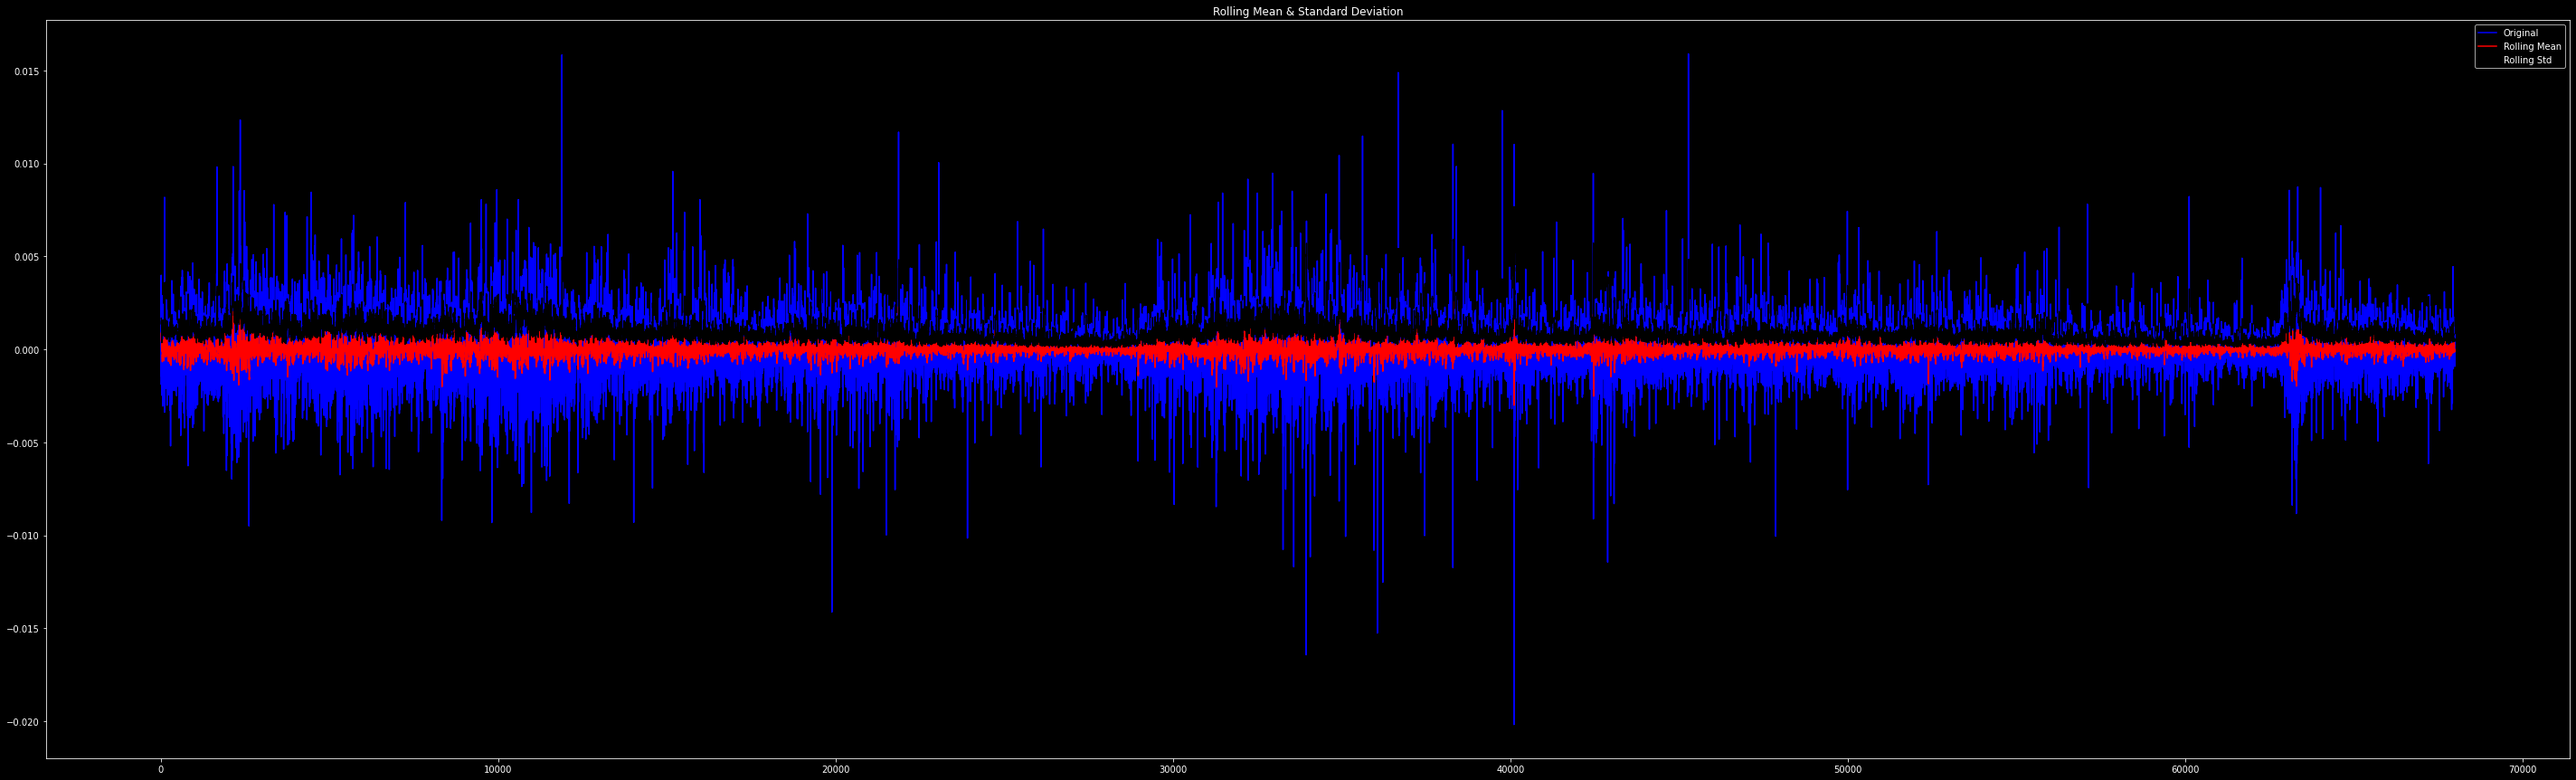

Results of Dickey Fuller Test:
Test Statistic                  -151.688014
p-value                            0.000000
#Lags Used                         2.000000
Number of Observations Used    67995.000000
Critical Value (1%)               -3.430446
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [84]:
test_stationarity(df['ClosePCTChange'].dropna())

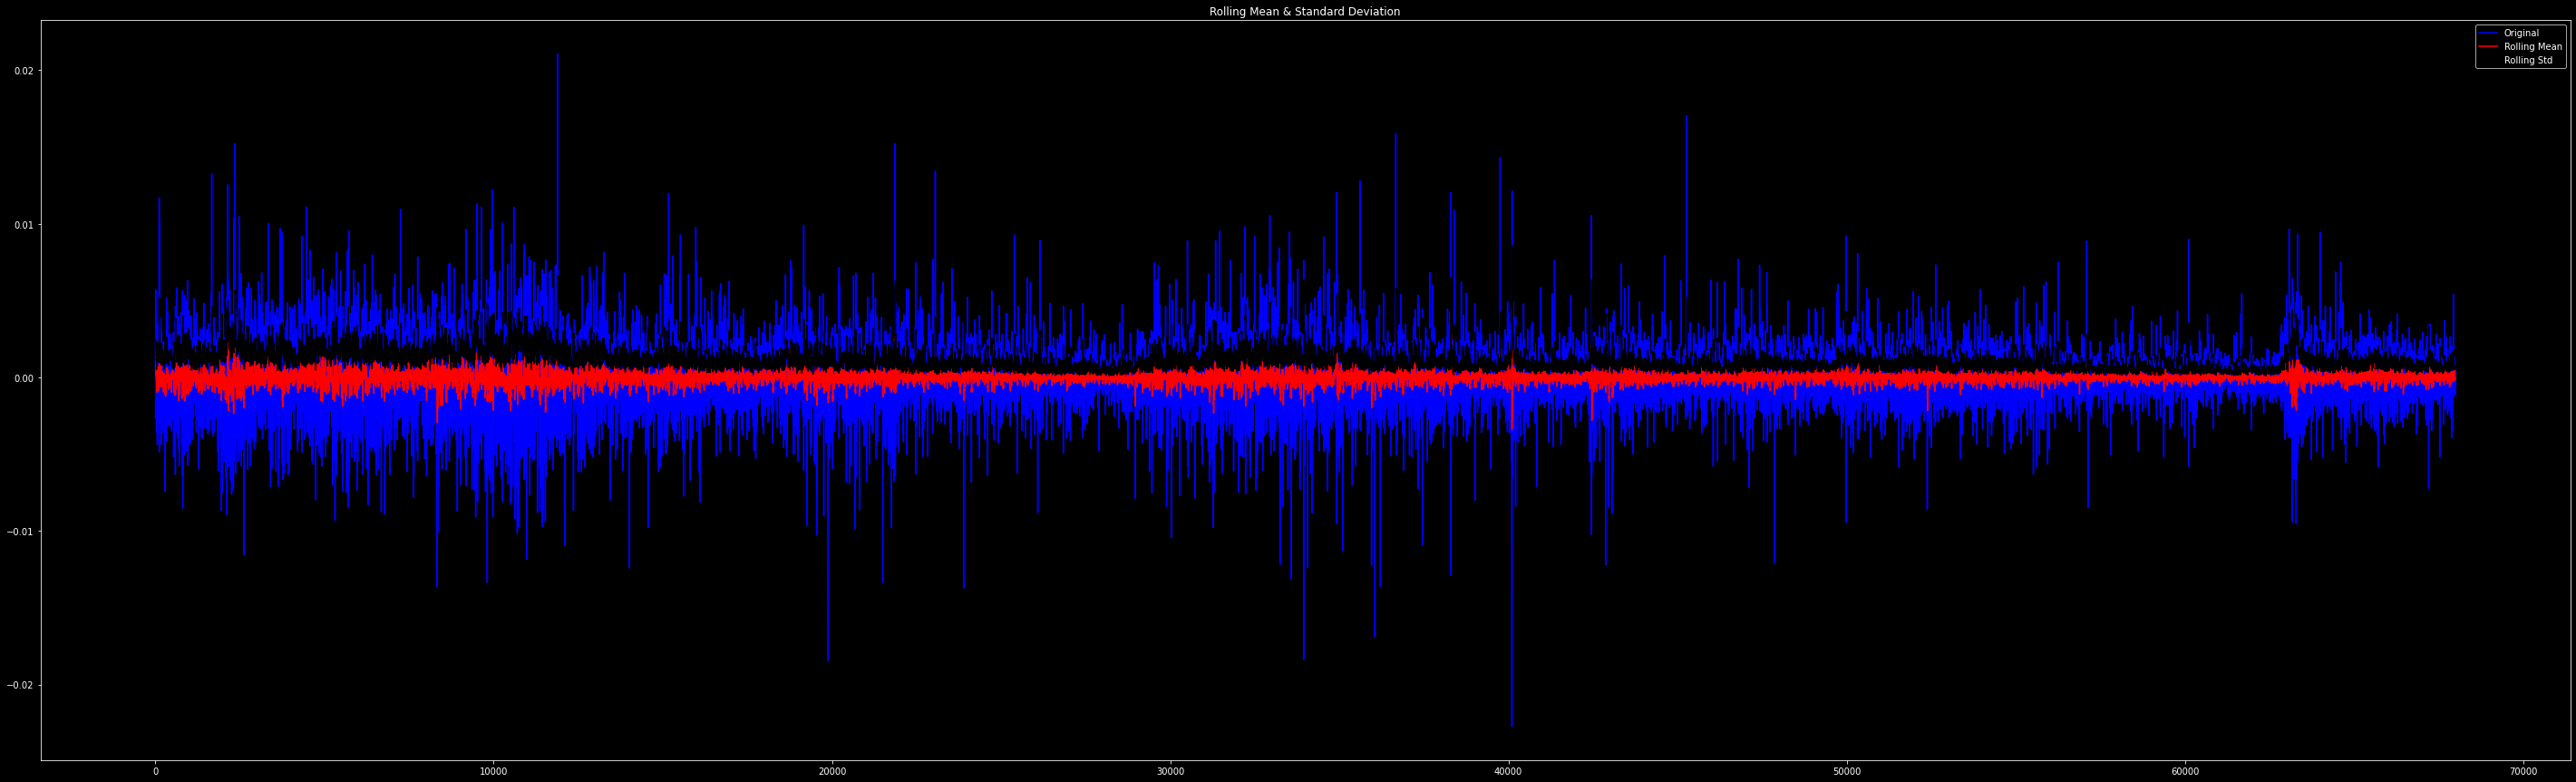

Results of Dickey Fuller Test:
Test Statistic                  -261.499355
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    67997.000000
Critical Value (1%)               -3.430446
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [85]:
test_stationarity(df['CloseDiff'].dropna())

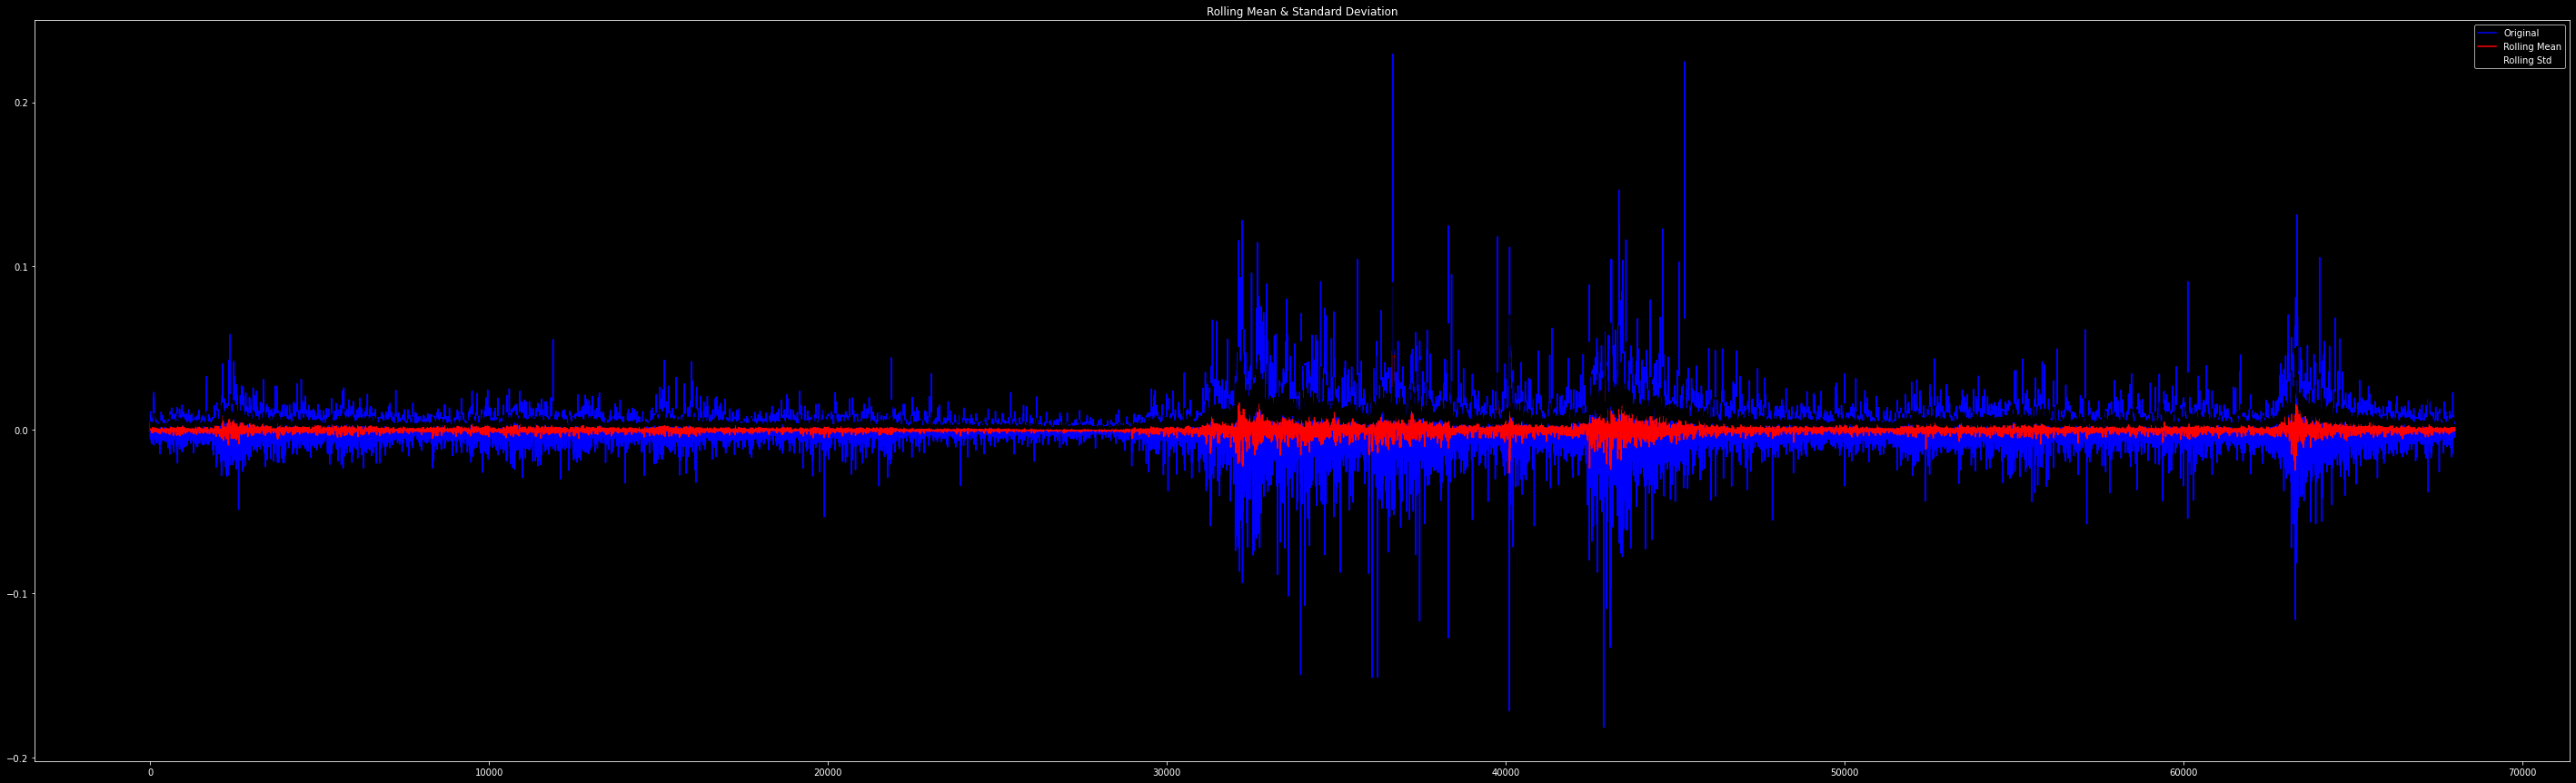

Results of Dickey Fuller Test:
Test Statistic                   -36.335025
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    67948.000000
Critical Value (1%)               -3.430446
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [86]:
test_stationarity(df['CloseLogEPCT'].dropna())

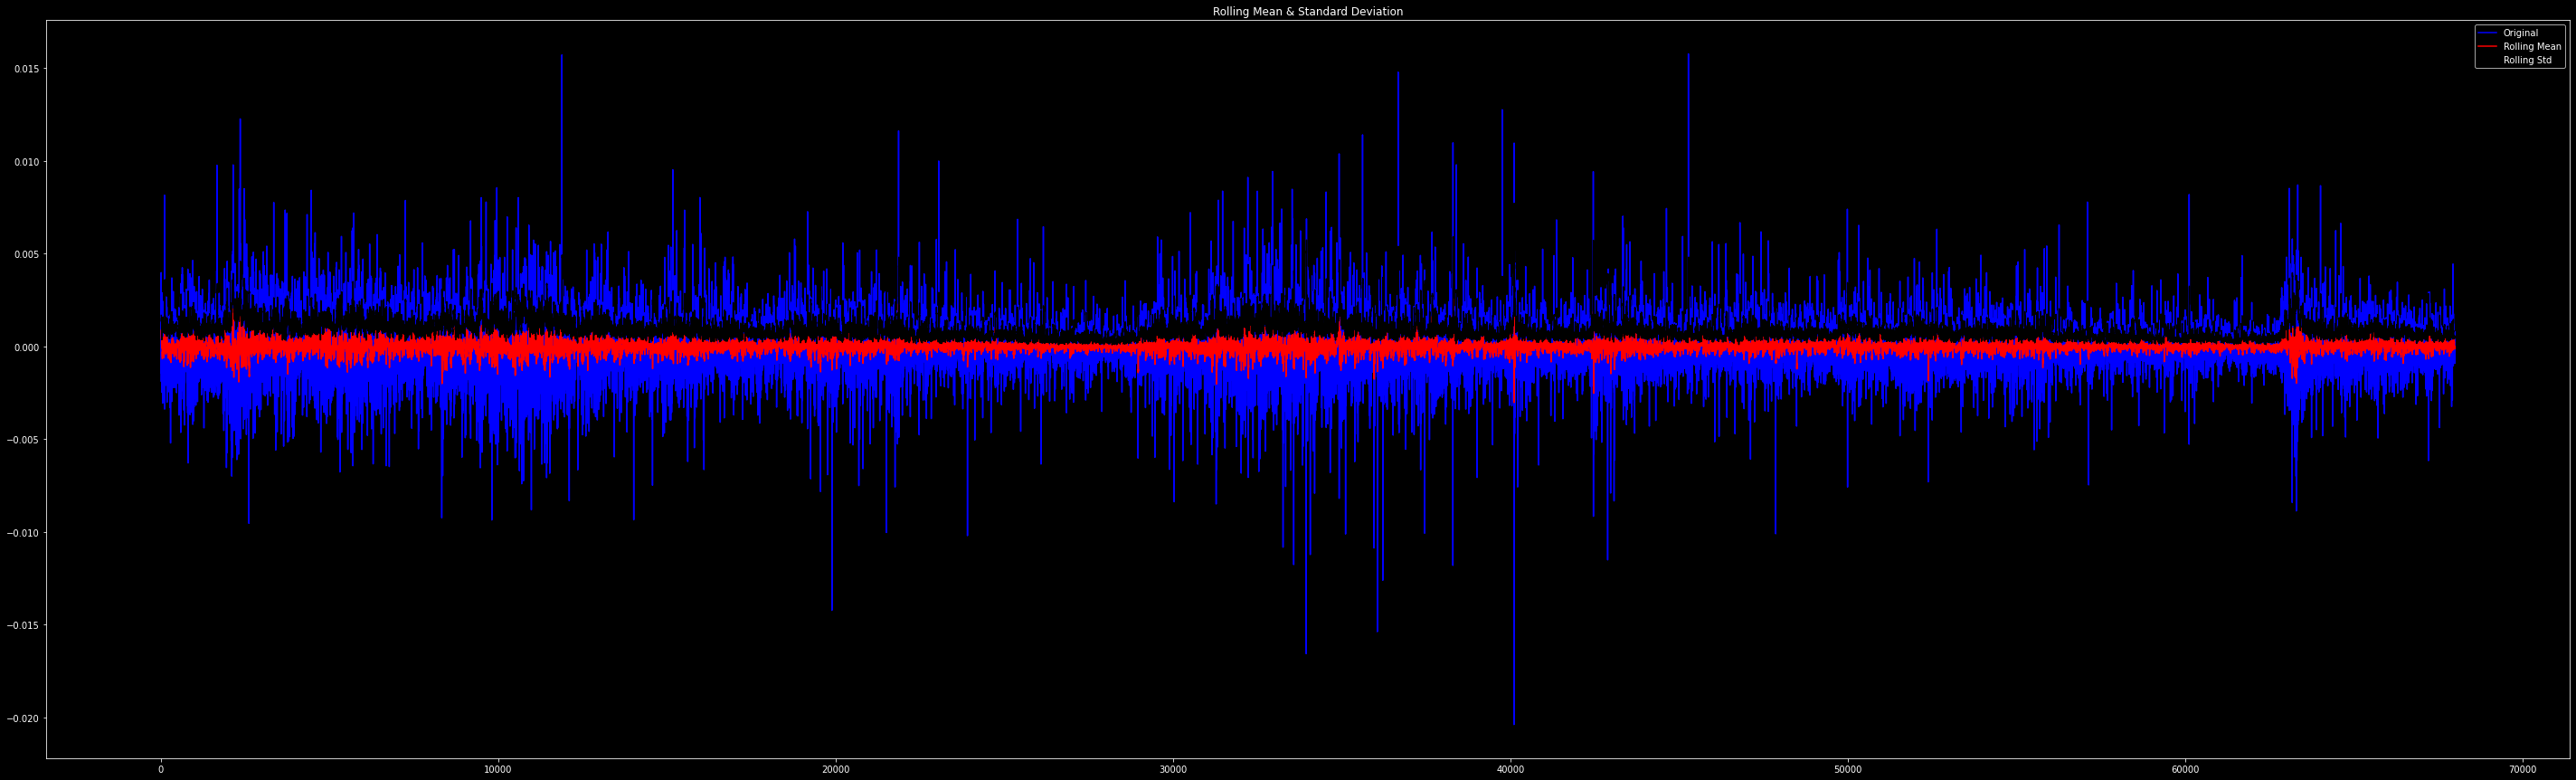

Results of Dickey Fuller Test:
Test Statistic                  -151.692456
p-value                            0.000000
#Lags Used                         2.000000
Number of Observations Used    67995.000000
Critical Value (1%)               -3.430446
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [87]:
test_stationarity(df['CloseLogEDiff'].dropna())

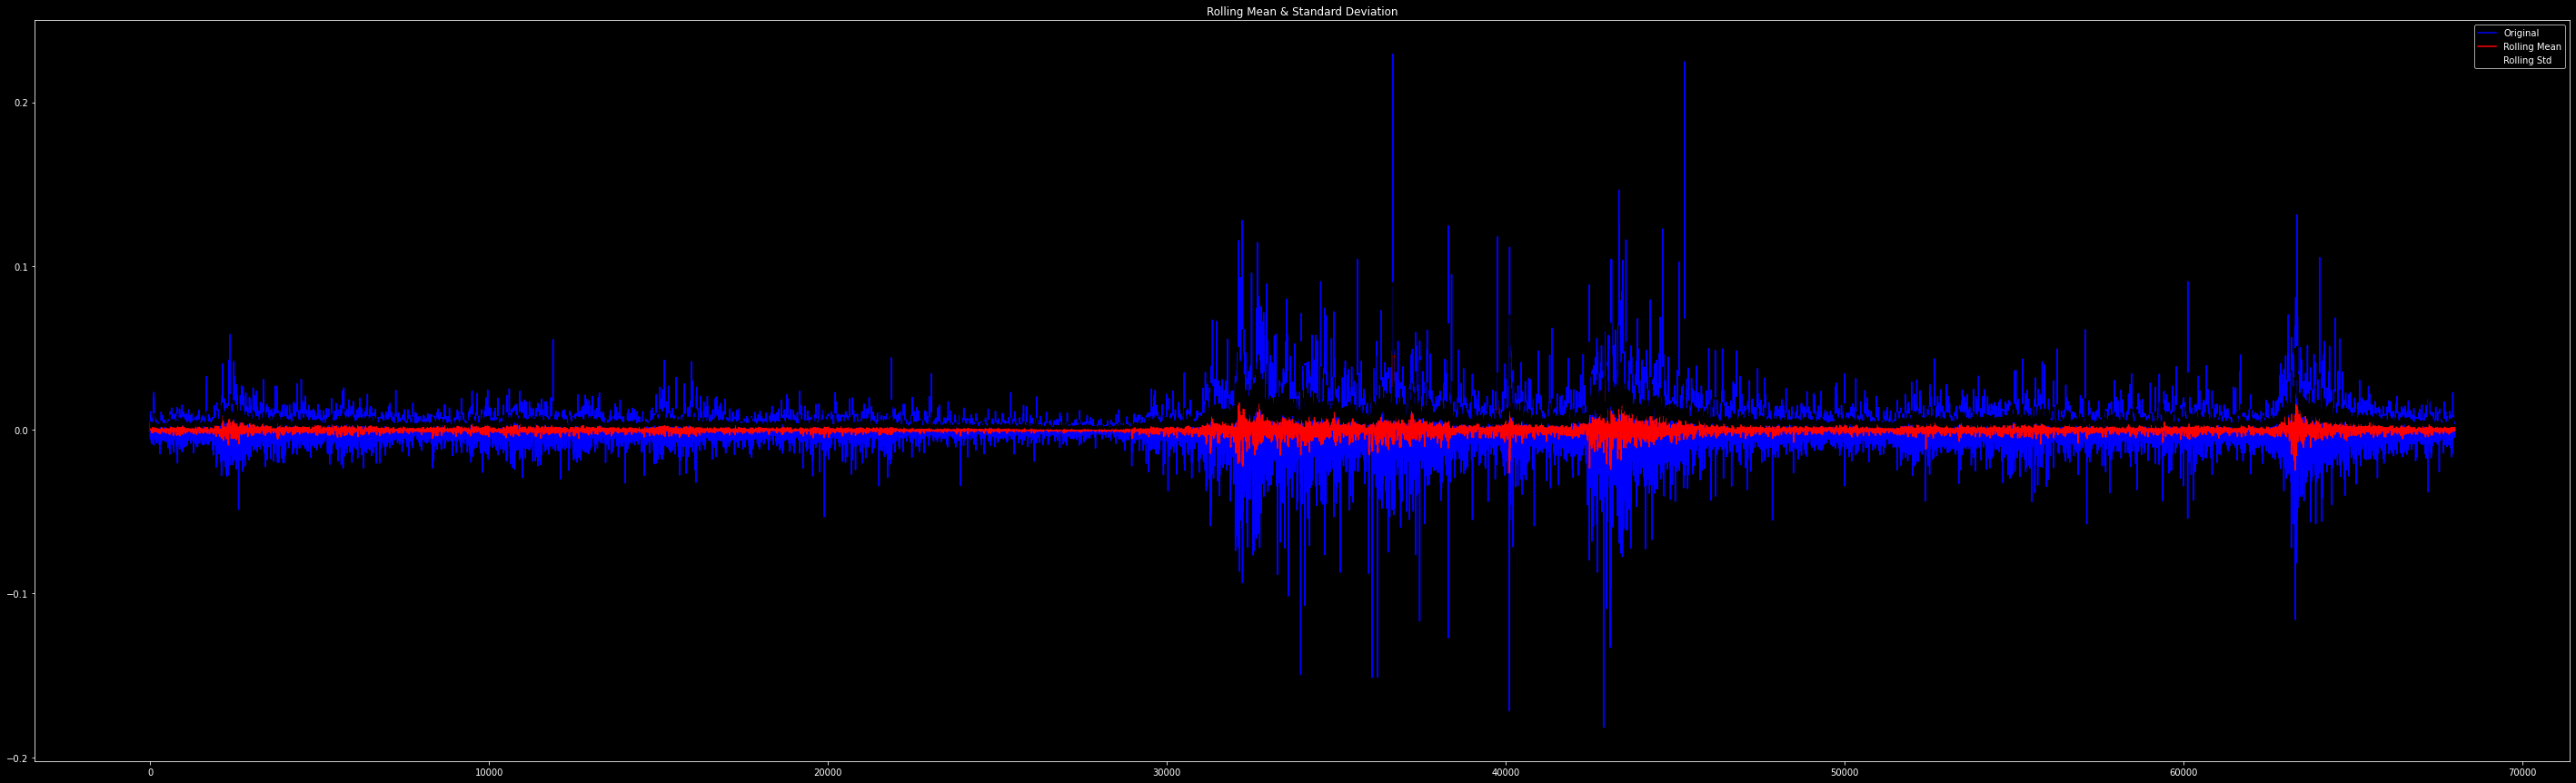

Results of Dickey Fuller Test:
Test Statistic                   -36.335025
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    67948.000000
Critical Value (1%)               -3.430446
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [88]:
test_stationarity(df['CloseLog10PCT'].dropna())

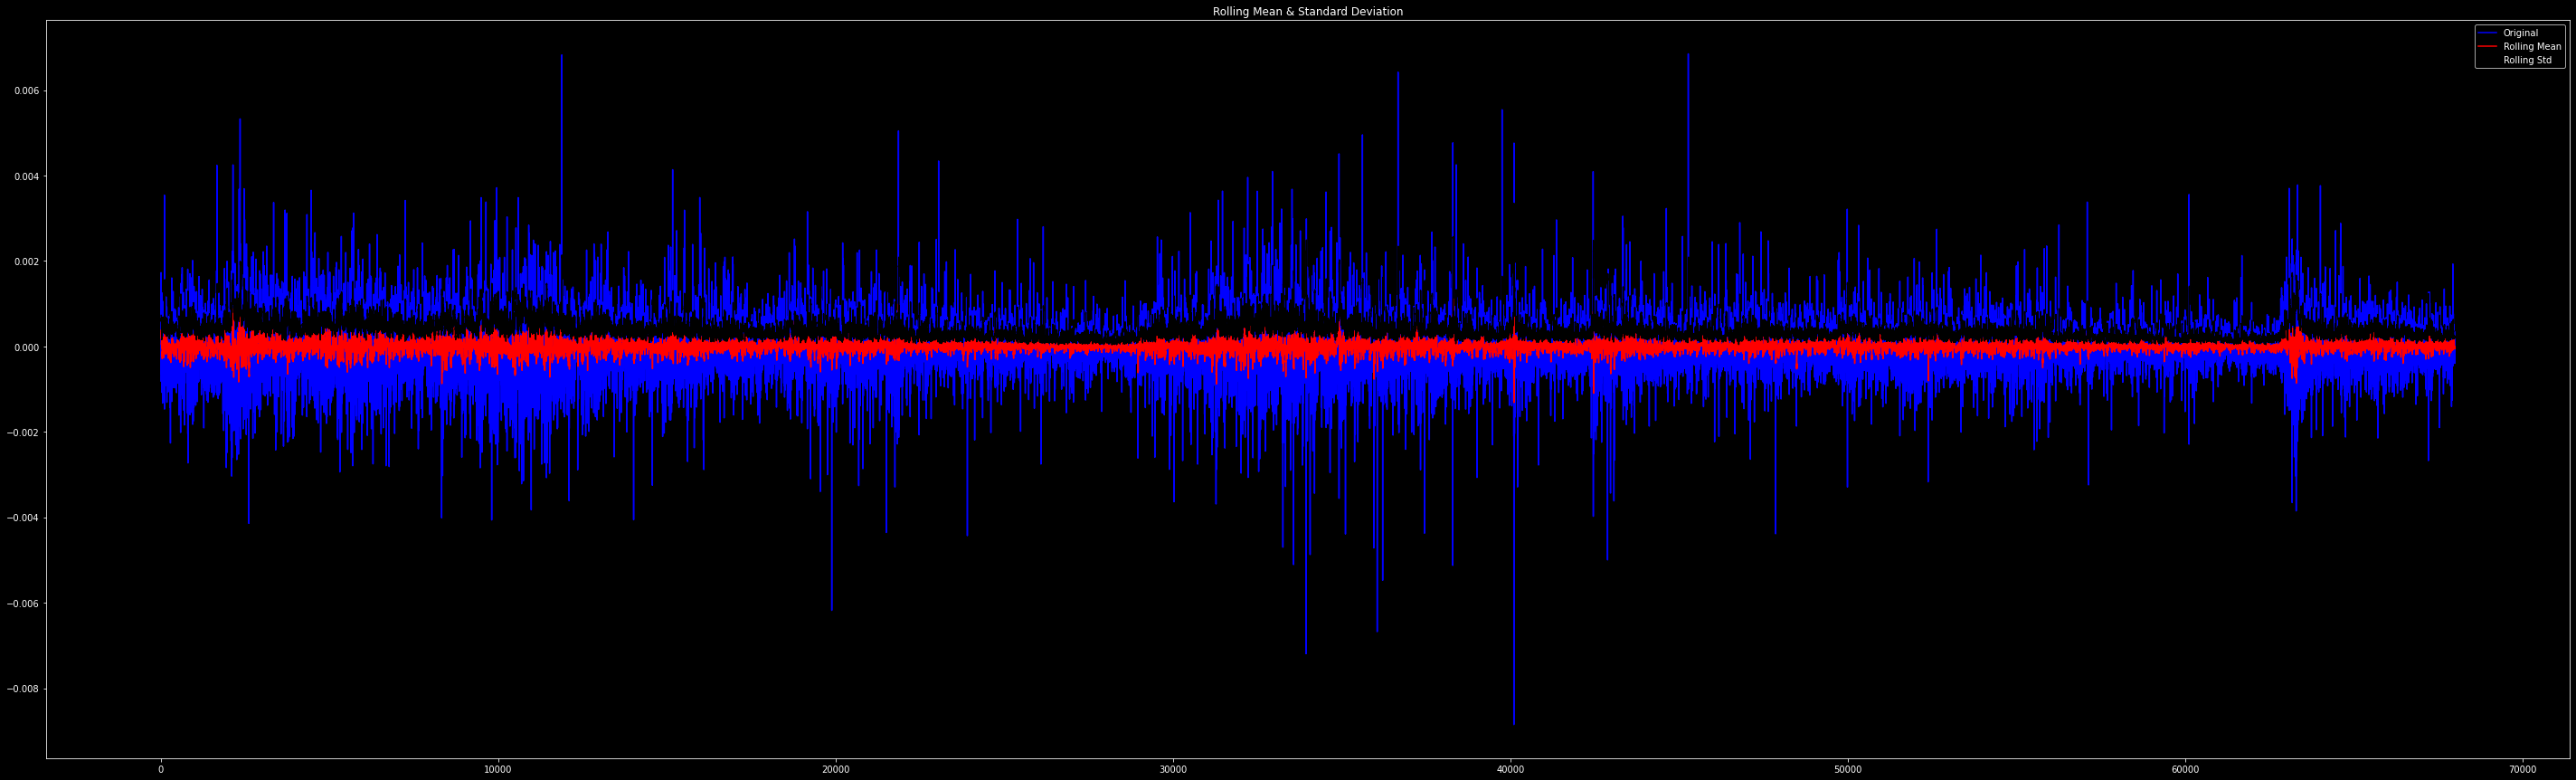

Results of Dickey Fuller Test:
Test Statistic                  -151.692456
p-value                            0.000000
#Lags Used                         2.000000
Number of Observations Used    67995.000000
Critical Value (1%)               -3.430446
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [89]:
test_stationarity(df['CloseLog10Diff'].dropna())